In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path = ".\AUTO_Logitech_Gaming_Keyboard_G213_1ms_1.csv"
data_start_line = 15 
data = pd.read_csv(file_path, sep=';', skiprows=data_start_line)

data.head()

,counter,latency,delayTime
0,0,2978,1918
1,1,2986,892
2,2,2362,1513
3,3,2273,4591
4,4,2266,1477


In [3]:
gk_latency_mean = data['latency'].mean()
gk_latency_std = data['latency'].std()

print(f"Mittelwert: {gk_latency_mean}")
print(f"Standardabweichung: {gk_latency_std}")

Mittelwert: 2548.169
Standardabweichung: 342.3906303957262


In [4]:
gk_latency_mean_ms = gk_latency_mean / 1000
gk_latency_std_ms = gk_latency_std / 1000

print(f"Mittelwert in mekunden: {gk_latency_mean_ms}")
print(f"Standardabweichung in Sekunden: {gk_latency_std_ms}")

Mittelwert in mekunden: 2.5481689999999997
Standardabweichung in Sekunden: 0.3423906303957262


In [8]:
# Parameter der Simulation
n_simulationen = 10000  # Anzahl der Monte-Carlo-Läufe

# fürn Bildschirm
refresh_cycle_min = 0  # Minimaler Zeitwert innerhalb eines Refresh-Cycles
refresh_cycle_max = 16.66  # Maximaler Zeitwert innerhalb eines Refresh-Cycles
constant_delay_min = 5  # Mindestverzögerung in ms
constant_delay_max = 12

compatible_mean = 708.46 
compatible_std = 306.51 
incompatible_mean = 659.66  
incompatible_std = 122.77  

In [9]:
refresh_cycle_delay = np.random.uniform(refresh_cycle_min, refresh_cycle_max, n_simulationen)
constant_delay = np.random.uniform(constant_delay_min, constant_delay_max, n_simulationen)
bildschirm_latenzen = refresh_cycle_delay + constant_delay

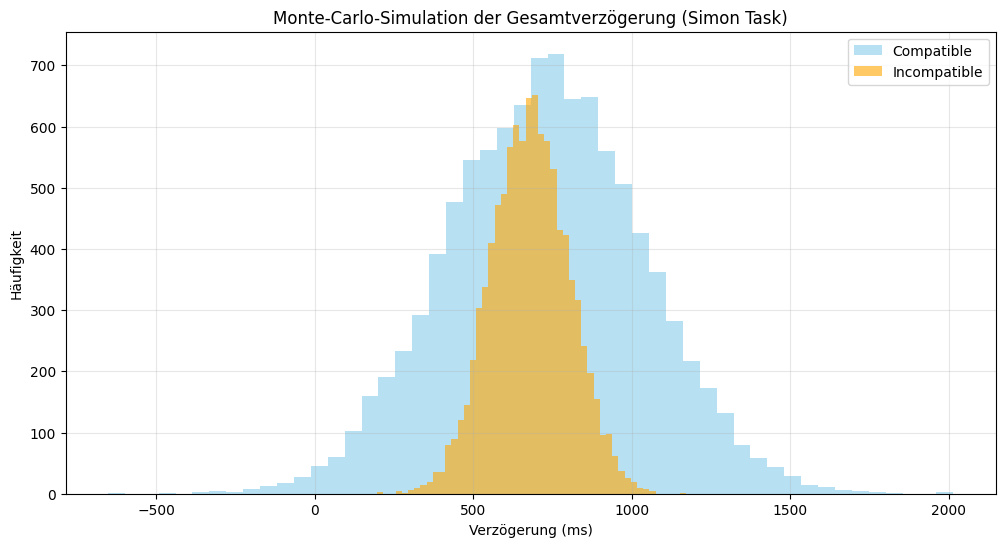

Compatible - Mittelwert der Gesamtverzögerung: 725.62 ms
Compatible - Standardabweichung der Gesamtverzögerung: 307.62 ms
Incompatible - Mittelwert der Gesamtverzögerung: 679.10 ms
Incompatible - Standardabweichung der Gesamtverzögerung: 122.13 ms


In [10]:
eingabe_latenzen = np.random.normal(gk_latency_mean_ms, gk_latency_std_ms, n_simulationen)

compatible_reactions = np.random.normal(compatible_mean, compatible_std, n_simulationen)
incompatible_reactions = np.random.normal(incompatible_mean, incompatible_std, n_simulationen)

gesamtverzögerung_compatible = bildschirm_latenzen + eingabe_latenzen + compatible_reactions
gesamtverzögerung_incompatible = bildschirm_latenzen + eingabe_latenzen + incompatible_reactions

plt.figure(figsize=(12, 6))
plt.hist(gesamtverzögerung_compatible, bins=50, alpha=0.6, label='Compatible', color='skyblue')
plt.hist(gesamtverzögerung_incompatible, bins=50, alpha=0.6, label='Incompatible', color='orange')
plt.title('Monte-Carlo-Simulation der Gesamtverzögerung (Simon Task)')
plt.xlabel('Verzögerung (ms)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Statistische Kennzahlen der Simulation
compatible_mean_final = np.mean(gesamtverzögerung_compatible)
compatible_std_final = np.std(gesamtverzögerung_compatible)
incompatible_mean_final = np.mean(gesamtverzögerung_incompatible)
incompatible_std_final = np.std(gesamtverzögerung_incompatible)

print(f"Compatible - Mittelwert der Gesamtverzögerung: {compatible_mean_final:.2f} ms")
print(f"Compatible - Standardabweichung der Gesamtverzögerung: {compatible_std_final:.2f} ms")
print(f"Incompatible - Mittelwert der Gesamtverzögerung: {incompatible_mean_final:.2f} ms")
print(f"Incompatible - Standardabweichung der Gesamtverzögerung: {incompatible_std_final:.2f} ms")